In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = load_iris()

In [3]:
data['data'].shape

(150, 4)

## Functions for normal k-means

In [68]:
def initail_means(points,k):
    random_idx = np.random.randint(points.shape[0],size=k)
    random_points = points[random_idx]
    return random_points

def euc_distance(x1,x2):
    dist = np.sqrt((x1[0]-x2[0])**2 + (x1[1]-x2[1])**2 + (x1[2]-x2[2])**2 + (x1[3]-x2[3])**2)
    return dist

def create_dist_table(points,random_points,k):
    dist_table = np.zeros((points.shape[0],k+1))
    for i in range(points.shape[0]):
        for j in range(k):
            dist_table[i,j] = euc_distance(points[i],random_points[j])
        dist_table[i,k] = np.argmin(dist_table[i,:-1]) + 1
    return dist_table

def find_new_means(points,dist_table,k,last_mean):
    means = np.zeros((k,points.shape[1]))
    for i in range(1,k+1):
        idx = np.argwhere(dist_table[:,k] == i)
        if(idx.size == 0):
            means[i-1,:] = last_mean[i-1,:]
        else:
            means[i-1,:] = np.mean(points[idx,:],axis=0)
    return means

def stop_k_mean(last_mean,current_mean):
    state = np.array_equal(last_mean,current_mean)
    return state

def k_means(points,k,iter):
    first_means = initail_means(points,k)
    dist_table = create_dist_table(points,first_means,k)
    #costs = np.zeros(iter)
    #ratios = np.zeros(iter)
    last_mean = first_means
    for i in range(iter):
        new_means = find_new_means(points,dist_table,k,last_mean)
        dist_table = create_dist_table(points,new_means,k)
        #costs[i] = cost_function(dist_table)
        #ratios[i] = ratio(dist_table)
        last_mean = new_means
        # if(stop_k_mean(last_mean,new_means) == True):
        #     break
        #last_mean = new_means
    costs = cost_function(dist_table)
    ratios = ratio(dist_table)
    return dist_table,costs,ratios

def cost_function(dist_table):
    distances = 0
    for i in range(dist_table.shape[0]):
        distances += dist_table[i,int(dist_table[i,-1])-1]
    return distances 

def inner_distance(dist_table):
    inner_distances = 0
    for i in range(dist_table.shape[0]):
        inner_distances += dist_table[i,int(dist_table[i,-1])-1]
    return inner_distances 

def outer_distance(dist_table):
    outer_distance = 0
    for i in range(dist_table.shape[0]):
        for j in range(dist_table.shape[1]):
            if(j != int(dist_table[i,-1])-1):
                outer_distance += dist_table[i,j]
    return outer_distance

def ratio(dist_table):
    ratio = outer_distance(dist_table)/(outer_distance(dist_table) + inner_distance(dist_table))
    return ratio


## Part 1

Text(0.5, 0, 'Iteration')

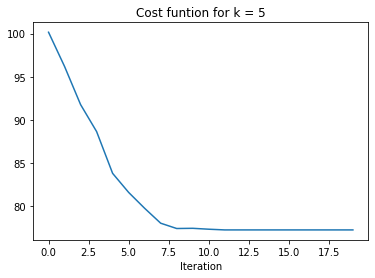

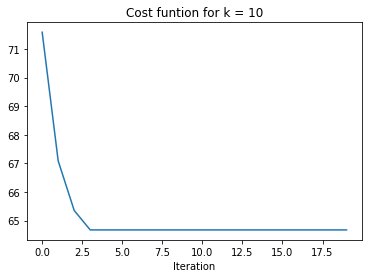

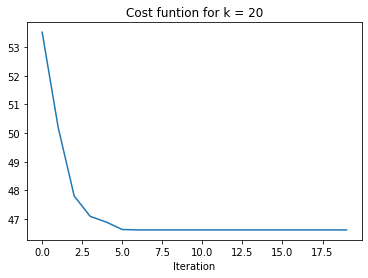

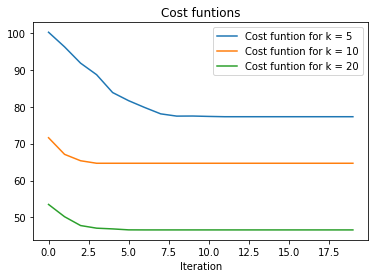

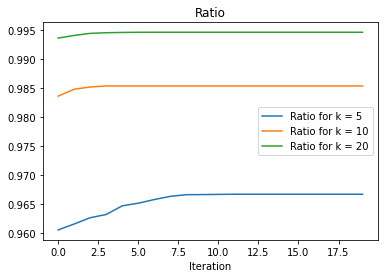

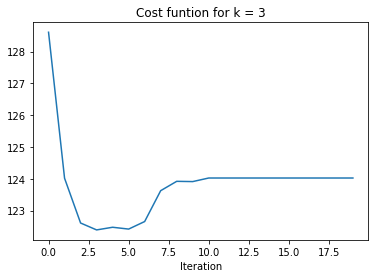

In [5]:
points = data['data']

iter = 20
algorithm_iter = 20

# ratios1 = np.zeros(algorithm_iter)
# ratios2 = np.zeros(algorithm_iter)
# ratios3 = np.zeros(algorithm_iter)
# ratios4 = np.zeros(algorithm_iter)

# costs1 = np.zeros(algorithm_iter)
# costs2 = np.zeros(algorithm_iter)
# costs3 = np.zeros(algorithm_iter)
# costs4 = np.zeros(algorithm_iter)



for i in range(algorithm_iter):
    dist_table, costs1, ratios1 = k_means(points,5,iter)
plt.figure(1)
plt.plot(costs1)
plt.title("Cost funtion for k = 5")
plt.xlabel('Iteration')

for i in range(algorithm_iter):
    dist_table, costs2, ratios2 = k_means(points,10,iter)
plt.figure(2)
plt.plot(costs2)
plt.title("Cost funtion for k = 10")
plt.xlabel('Iteration')

for i in range(algorithm_iter):
    dist_table, costs3, ratios3 = k_means(points,20,iter)
plt.figure(3)
plt.plot(costs3)
plt.title("Cost funtion for k = 20")
plt.xlabel('Iteration')

plt.figure(4)
plt.plot(costs1,label = 'Cost funtion for k = 5')
plt.plot(costs2,label = "Cost funtion for k = 10")
plt.plot(costs3,label = "Cost funtion for k = 20")
plt.xlabel('Iteration')
plt.title("Cost funtions")
plt.legend()

plt.figure(5)
plt.plot(ratios1,label = 'Ratio for k = 5')
plt.plot(ratios2,label = "Ratio for k = 10")
plt.plot(ratios3,label = "Ratio for k = 20")
plt.xlabel('Iteration')
plt.title("Ratio")
plt.legend()

for i in range(algorithm_iter):
    dist_table, costs4, ratios4 = k_means(points,3,iter)
plt.figure(6)
plt.plot(costs4)
plt.title("Cost funtion for k = 3")
plt.xlabel('Iteration')


Ratio mean for k = 5:  0.9654885258078997
Ratio variance for k = 5:  3.5814726840277775e-06
Cost mean for k = 5:  81.39218876440478
Cost variance for k = 5:  47.57512765836422
-----------------------------------------------
Ratio mean for k = 10:  0.9852076358709929
Ratio variance for k = 10:  1.5538332988571285e-07
Cost mean for k = 10:  65.17389177173892
Cost variance for k = 10:  2.453809453305433
-----------------------------------------------
Ratio mean for k = 20:  0.9944903223277682
Ratio variance for k = 20:  5.9062767168571646e-08
Cost mean for k = 20:  47.24066384780908
Cost variance for k = 20:  2.7186566368200524
-----------------------------------------------
Ratio mean for k = 3:  0.9150797440208283
Ratio variance for k = 3:  1.2127531046599346e-06
Cost mean for k = 3:  123.84179213698398
Cost variance for k = 3:  1.6048841205888191


Text(0.5, 0, 'k')

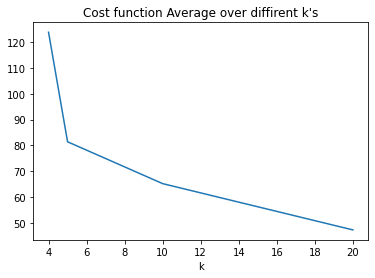

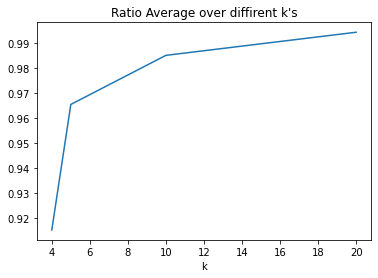

In [7]:

mean_5 = np.mean(ratios1)
variance_5 = np.var(ratios1)
print("Ratio mean for k = 5: ",mean_5)
print("Ratio variance for k = 5: ",variance_5)
mean_5_c = np.mean(costs1)
variance_5_c = np.var(costs1)
print("Cost mean for k = 5: ",mean_5_c)
print("Cost variance for k = 5: ",variance_5_c)
print("-----------------------------------------------")

mean_10 = np.mean(ratios2)
variance_10 = np.var(ratios2)
print("Ratio mean for k = 10: ",mean_10)
print("Ratio variance for k = 10: ",variance_10)
mean_10_c = np.mean(costs2)
variance_10_c = np.var(costs2)
print("Cost mean for k = 10: ",mean_10_c)
print("Cost variance for k = 10: ",variance_10_c)
print("-----------------------------------------------")


mean_20 = np.mean(ratios3)
variance_20 = np.var(ratios3)
print("Ratio mean for k = 20: ",mean_20)
print("Ratio variance for k = 20: ",variance_20)
mean_20_c = np.mean(costs3)
variance_20_c = np.var(costs3)
print("Cost mean for k = 20: ",mean_20_c)
print("Cost variance for k = 20: ",variance_20_c)
print("-----------------------------------------------")


mean_3 = np.mean(ratios4)
variance_3 = np.var(ratios4)
print("Ratio mean for k = 3: ",mean_3)
print("Ratio variance for k = 3: ",variance_3)
mean_3_c = np.mean(costs4)
variance_3_c = np.var(costs4)
print("Cost mean for k = 3: ",mean_3_c)
print("Cost variance for k = 3: ",variance_3_c)


means_r = [mean_3,mean_5,mean_10,mean_20]
means_c = [mean_3_c,mean_5_c,mean_10_c,mean_20_c]

plt.figure(1)
plt.plot([4,5,10,20],means_c)
plt.title("Cost function Average over diffirent k's")
plt.xlabel('k')

plt.figure(2)
plt.plot([4,5,10,20],means_r)
plt.title("Ratio Average over diffirent k's")
plt.xlabel('k')

## Part 2

In [44]:
Constraint = pd.read_csv("Constraint.csv")
constraint = Constraint.values
idx = np.random.choice(60,60)
constraint = constraint[idx,:]

In [46]:
def conditioned_k_means(points,k,iter):
    first_means = initail_means(points,k)
    dist_table = create_dist_table(points,first_means,k)
    #costs = np.zeros(iter)
    last_mean = first_means
    for i in range(iter):
        new_means = find_new_means(points,dist_table,k,last_mean)
        dist_table = create_dist_table(points,new_means,k)
        #costs[i] = cost_function(dist_table)
        dist_table = check_constraints(dist_table,constraint)
        last_mean = new_means

    ratios = ratio(dist_table)
    costs = cost_function(dist_table)
    return dist_table,costs,ratios


def check_constraints(dist_table,constraint):
    dist = dist_table.copy()
    for i in range(constraint.shape[0]):
        if(constraint[i,-1] == -1):
            idx1 = constraint[i,0]
            idx2 = constraint[i,1]
            if(same_group(dist,idx1,idx2)):
                far_idx = find_farther(dist,idx1,idx2)
                dist[far_idx,-1] = find_closest_cluster(dist,far_idx) + 1
        if(constraint[i,-1] == 1):
            idx1 = constraint[i,0]
            idx2 = constraint[i,1]
            if(~same_group(dist,idx1,idx2)):
                dist1 = distance_to_mean(dist,idx1)
                dist2 = distance_to_mean(dist,idx2)
                if(dist1 < dist2):
                    dist[idx2,-1] = dist[idx1,-1]
                else:
                    dist[idx1,-1] = dist[idx2,-1]

    return dist

def same_group(dist_table,idx1,idx2):
    if(dist_table[idx1,-1] == dist_table[idx2,-1]):
        return True
    else:
        return False

def find_farther(dist_table,idx1,idx2):
    if(dist_table[idx1,int(dist_table[idx1,-1])-1] > dist_table[idx2,int(dist_table[idx2,-1])-1]):
        return idx1
    else:
        return idx2

def find_closest_cluster(dist_table,far_idx):
    closest_cluster = np.argsort(dist_table[far_idx,:-1])
    return closest_cluster[1]

def distance_to_mean(dist_table,idx):
    distance = dist_table[idx,int(dist_table[idx,-1])-1]
    return distance


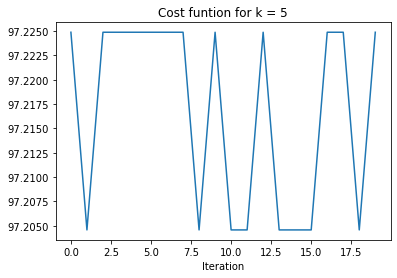

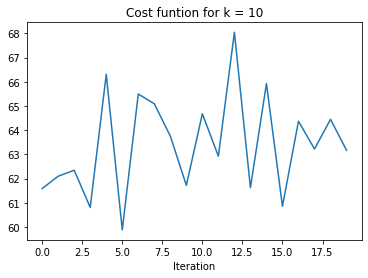

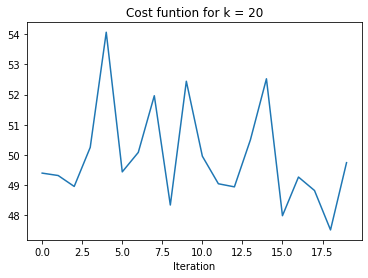

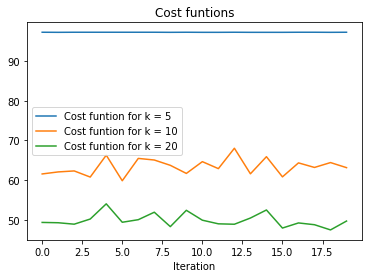

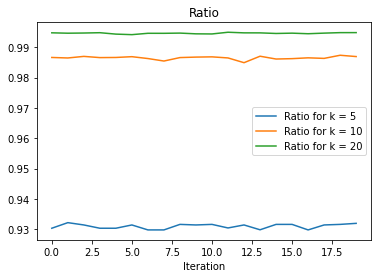

In [40]:
points = data['data']

iter = 20
algorithm_iter = 20
num_constraints = [20,40,60]

ratios1 = np.zeros(algorithm_iter)
ratios2 = np.zeros(algorithm_iter)
ratios3 = np.zeros(algorithm_iter)
costs1 = np.zeros(algorithm_iter)
costs2 = np.zeros(algorithm_iter)
costs3 = np.zeros(algorithm_iter)


for i in range(algorithm_iter):
    dist_table, costs1[i], ratios1[i] = conditioned_k_means(points,3,iter)
    
plt.figure(1)
plt.plot(costs1)
plt.title("Cost funtion for k = 5")
plt.xlabel('Iteration')

for i in range(algorithm_iter):
    dist_table, costs2[i], ratios2[i] = conditioned_k_means(points,10,iter)
plt.figure(2)
plt.plot(costs2)
plt.title("Cost funtion for k = 10")
plt.xlabel('Iteration')

for i in range(algorithm_iter):
    dist_table, costs3[i], ratios3[i] = conditioned_k_means(points,20,iter)
plt.figure(3)
plt.plot(costs3)
plt.title("Cost funtion for k = 20")
plt.xlabel('Iteration')

plt.figure(4)
plt.plot(costs1,label = 'Cost funtion for k = 5')
plt.plot(costs2,label = "Cost funtion for k = 10")
plt.plot(costs3,label = "Cost funtion for k = 20")
plt.xlabel('Iteration')
plt.title("Cost funtions")
plt.legend()

plt.figure(5)
plt.plot(ratios1,label = 'Ratio for k = 5')
plt.plot(ratios2,label = "Ratio for k = 10")
plt.plot(ratios3,label = "Ratio for k = 20")
plt.xlabel('Iteration')
plt.title("Ratio")
plt.legend()




In [33]:
con_60_cost_5 = np.mean(costs1)
con_60_cost_10 = np.mean(costs2)
con_60_cost_20 = np.mean(costs3)
con_60_r_5 = np.mean(ratios1)
con_60_r_10 = np.mean(ratios2)
con_60_r_20 = np.mean(ratios3)

In [37]:
con_40_cost_5 = np.mean(costs1)
con_40_cost_10 = np.mean(costs2)
con_40_cost_20 = np.mean(costs3)
con_40_r_5 = np.mean(ratios1)
con_40_r_10 = np.mean(ratios2)
con_40_r_20 = np.mean(ratios3)

In [41]:
con_20_cost_5 = np.mean(costs1)
con_20_cost_10 = np.mean(costs2)
con_20_cost_20 = np.mean(costs3)
con_20_r_5 = np.mean(ratios1)
con_20_r_10 = np.mean(ratios2)
con_20_r_20 = np.mean(ratios3)

Text(0.5, 1.0, 'Ratios for diffirent number of constraints')

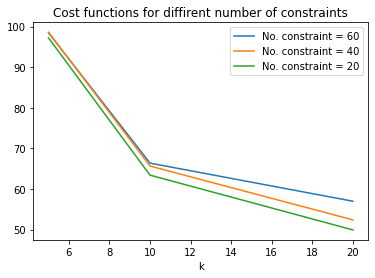

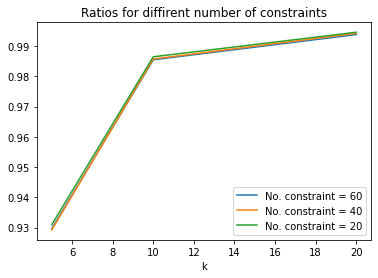

In [43]:
plt.figure(1)
plt.plot([5,10,20],[con_60_cost_5,con_60_cost_10,con_60_cost_20],label = 'No. constraint = 60')
plt.plot([5,10,20],[con_40_cost_5,con_40_cost_10,con_40_cost_20],label = 'No. constraint = 40')
plt.plot([5,10,20],[con_20_cost_5,con_20_cost_10,con_20_cost_20],label = 'No. constraint = 20')
plt.legend()
plt.xlabel("k")
plt.title("Cost functions for diffirent number of constraints")

plt.figure(2)
plt.plot([5,10,20],[con_60_r_5,con_60_r_10,con_60_r_20],label = 'No. constraint = 60')
plt.plot([5,10,20],[con_40_r_5,con_40_r_10,con_40_r_20],label = 'No. constraint = 40')
plt.plot([5,10,20],[con_20_r_5,con_20_r_10,con_20_r_20],label = 'No. constraint = 20')
plt.legend()
plt.xlabel("k")
plt.title("Ratios for diffirent number of constraints")

### Conditioned clustering evaluation

In [62]:
Constraint = pd.read_csv("Constraint.csv")
constraint = Constraint.values
idx = np.random.choice(60,20)
constraint = constraint[idx,:]

In [69]:
points = data['data']

iter = 20
algorithm_iter = 20
num_constraints = [20,40,60]

ratios1 = np.zeros(algorithm_iter)
costs1 = np.zeros(algorithm_iter)

for i in range(algorithm_iter):
    dist_table, costs1[i], ratios1[i] = k_means(points,3,iter)
    


In [70]:
dist_table[:50,-1]

array([3., 1., 1., 1., 3., 3., 1., 3., 1., 1., 3., 3., 1., 1., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 1., 1., 3., 3., 3., 1., 1., 3., 3., 3.,
       1., 3., 3., 3., 1., 3., 3., 1., 1., 3., 3., 1., 3., 1., 3., 3.])

In [71]:
dist_table[50:100,-1]

array([2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 1., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 1., 2.])

In [72]:
dist_table[100:150,-1]

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])